# Imports

In [2]:
import pandas as pd
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sqlite3
import math

https://pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/
https://python.plainenglish.io/opencv-image-stitching-second-part-388784ccd1a
https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html



# Function Definitions

   # 20221229

In [3]:
fld= '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524/'
fld_thermal = '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_linear/'
fld_thermal_csv = '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/'

In [4]:
db_file = os.path.join(fld,'media.db')
con = sqlite3.connect(db_file)
cur = con.cursor()
x=[row for row in cur.execute("SELECT * FROM resources ")]

media_id       
TEXT     
NOT NULL PRIMARY KEY,type          
TEXT     
NOT NULL,datetime       
CHAR(30),size           
INTEGER,run_id         
TEXT     
NOT NULL,has_thumbnail  
INTEGER,thumbnail      
TEXT,photo_mode     
INTEGER,duration       
INTEGER,gps_valid      
INTEGER,latitude       
REAL,longitude      
REAL,altitude       
REAL,sequence_mode  
TEXT,sequence_count 
INTEGER,has_thermal    
INTEGER,is_replayable  
INTEGER,video_mode     
CHAR(20),present        
INTEGER))

In [5]:
x[0]

('10000111',
 '100001110201.JPG',
 'PHOTO',
 2329,
 '20210524T110146-0400',
 '0981C9F8E6B55B50D4E6EFC06961EEB3',
 'JPG',
 6478837,
 1,
 40.353302,
 -74.719749,
 50.391037,
 3264,
 2448,
 1,
 0,
 6,
 0.0,
 5,
 0,
 0,
 1,
 0,
 '',
 '',
 'removable_storage',
 1)

In [6]:
'P'+x[0][1][5:-4]+"- photo.JPG"

'P1110201- photo.JPG'

In [7]:
x[0][9:12] #lat, long, alt

(40.353302, -74.719749, 50.391037)

In [8]:
names = []
lats=[]
lons=[]
heights=[]

for i in np.arange(0,len(x)):
    names.append('P'+x[i][1][5:-4]+"- photo.JPG")
    lats.append(x[i][9])
    lons.append(x[i][10])
    heights.append(x[i][11])

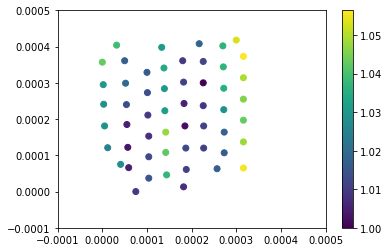

In [9]:
plt.scatter(lats-np.min(lats),lons-np.min(lons),c=heights/np.min(heights))
plt.xlim((-0.0001,0.0005))
plt.ylim((-0.0001,0.0005))
plt.colorbar()

In [10]:
df_data=pd.DataFrame({'names':names,'lats':lats,'lons':lons,'heights':heights})

In [11]:
df_data

names       lats       lons    heights
0   P1110201- photo.JPG  40.353302 -74.719749  50.391037
1   P1110202- photo.JPG  40.353302 -74.719677  50.018593
2   P1110203- photo.JPG  40.353302 -74.719617  49.781898
3   P1110204- photo.JPG  40.353302 -74.719559  49.911552
4   P1110205- photo.JPG  40.353302 -74.719500  50.089298
5   P1110206- photo.JPG  40.353302 -74.719441  50.423992
6   P1110207- photo.JPG  40.353286 -74.719396  50.257820
7   P1110208- photo.JPG  40.353256 -74.719412  49.477783
8   P1110209- photo.JPG  40.353257 -74.719470  49.488148
9   P1110210- photo.JPG  40.353258 -74.719529  49.438854
10  P1110211- photo.JPG  40.353258 -74.719588  49.100647
11  P1110212- photo.JPG  40.353259 -74.719650  48.553024
12  P1110213- photo.JPG  40.353259 -74.719707  48.498650
13  P1110214- photo.JPG  40.353243 -74.719751  48.536858
14  P1110215- photo.JPG  40.353213 -74.719694  48.229183
15  P1110216- photo.JPG  40.353213 -74.719633  48.259315
16  P1110217- photo.JPG  40.353212 -74.719577  48.152302
17  P1110218- photo.JPG  40.353212 -74.719514  47.732910
18  P1110219- photo.JPG  40.353212 -74.719455  48.279667
19  P1110220- photo.JPG  40.353203 -74.719406  48.601631
20  P1110221- photo.JPG  40.353166 -74.719453  48.190708
21  P1110222- photo.JPG  40.353168 -74.719512  48.248558
22  P1110223- photo.JPG  40.353169 -74.719571  47.990734
23  P1110224- photo.JPG  40.353171 -74.719633  47.820026
24  P1110225- photo.JPG  40.353173 -74.719694  48.324955
25  P1110226- photo.JPG  40.353174 -74.719753  48.252415
26  P1110227- photo.JPG  40.353168 -74.719801  48.095158
27  P1110228- photo.JPG  40.353130 -74.719768  49.517487
28  P1110229- photo.JPG  40.353128 -74.719706  49.757084
29  P1110230- photo.JPG  40.353128 -74.719650  50.010040
30  P1110231- photo.JPG  40.353126 -74.719591  49.219620
31  P1110232- photo.JPG  40.353125 -74.719530  49.175812
32  P1110233- photo.JPG  40.353124 -74.719473  49.359528
33  P1110234- photo.JPG  40.353119 -74.719416  49.200508
34  P1110235- photo.JPG  40.353086 -74.719485  48.508247
35  P1110236- photo.JPG  40.353087 -74.719541  48.378315
36  P1110237- photo.JPG  40.353088 -74.719603  48.192627
37  P1110238- photo.JPG  40.353090 -74.719661  48.097347
38  P1110239- photo.JPG  40.353090 -74.719718  48.312412
39  P1110240- photo.JPG  40.353090 -74.719777  48.448509
40  P1110241- photo.JPG  40.353061 -74.719814  48.192722
41  P1110242- photo.JPG  40.353045 -74.719748  47.972477
42  P1110243- photo.JPG  40.353043 -74.719692  47.877441
43  P1110244- photo.JPG  40.353041 -74.719629  47.973705
44  P1110245- photo.JPG  40.353040 -74.719574  48.376717
45  P1110246- photo.JPG  40.353038 -74.719515  48.652466
46  P1110247- photo.JPG  40.353036 -74.719453  48.541409
47  P1110248- photo.JPG  40.353018 -74.719410  49.593079
48  P1110249- photo.JPG  40.352986 -74.719457  49.774014
49  P1110250- photo.JPG  40.352988 -74.719519  49.170834
50  P1110251- photo.JPG  40.352989 -74.719573  49.071033
51  P1110252- photo.JPG  40.352991 -74.719633  49.087410
52  P1110253- photo.JPG  40.352998 -74.719693  48.919857
53  P1110254- photo.JPG  40.353027 -74.719739  49.038712

In [12]:
csv_paths=[]
for val in np.arange(0,54):
    csv_paths.append(os.path.join(fld_thermal_csv,str(val)+".csv"))
csv_paths

['/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/0.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/1.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/2.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/3.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/4.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/5.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/6.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/7.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/8.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/9.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv/10.csv',
 '/Users/dennise/Desktop/20210524-20221228T155821Z-001/20210524_thermal_csv

In [13]:
img=np.array(pd.read_csv(csv_paths[0],skiprows=1,index_col=0).reset_index().drop(columns=['index']))
type(img)

numpy.ndarray

In [31]:
for val in np.arange(0,8):
    print(val)
    img=np.array(pd.read_csv(csv_paths[val],skiprows=1,index_col=0).reset_index().drop(columns=['index']))
    cv2.imwrite('../data/{}.png'.format(val),img)

0
1
2
3
4
5
6
7


In [32]:
img=[]
for val in np.arange(0,8):
    img.append(cv2.imread('../data/{}.png'.format(val)))

In [40]:
cv2.imshow('img',img[0])

In [ ]:
imgs=[]
for idx in np.arange(0,54):
    nm=os.path.join(fld,df_data.names[idx])
    imgs.append(cv2.cvtColor(cv2.imread(nm),cv2.COLOR_BGR2GRAY))
    

In [ ]:
plt.imshow(imgs[4])

In [ ]:
grpval=0
grpvals=[]
for idx in np.arange(0,len(df_data)-1):
    absval=abs(df_data.lats[idx]-df_data.lats[idx+1])
    if absval > 0.00001:
        grpval+=1
        print(absval)
    grpvals.append(grpval)
grpvals.append(grpval+1)
df_data['grpval']=grpvals

In [ ]:
df_data

In [ ]:
stitched_grps=[]
for val in np.unique(df_data.grpval):
    sub_df=df_data[df_data.grpval==val].copy()
    if len(sub_df)>1:
        print(sub_df.index)
        # stitch those idxs and if img is created, append to stitched grps
        # make function to iteratively stitch? 

In [ ]:
# stitch pair, if this fails, use locations 
# if that fails,  make masks based on estimated overlap
    
stitched_imgs=[]
for idx in np.arange(0,54):
    
    # get similar points
    img_src=imgs[idx+1]
    img_dst=imgs[idx]
    orb=cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img_src,None)
    kp2, des2 = orb.detectAndCompute(img_dst,None)
    bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)
    try:
        matches20=matches[:20]
    except:
        matches20=matches
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches20 ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches20 ]).reshape(-1,1,2)
    ##
    h,status=cv2.findHomography(src_pts,dst_pts)
    ##
    width= img_src.shape[1]+img_dst.shape[1]
    height=img_dst.shape[0]+img_src.shape[0]
    img_out = cv2.warpPerspective(img_src, h, (width,height))
    stitched_imgs.append(img_out)

In [499]:
M,mask=cv2.findHomography(src_pts,dst_pts,cv2.RANSAC,5.0)

In [500]:
h,w = img_src.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)

In [507]:
img_dsttst=img_dst.copy()
imgtst = cv2.polylines(img_dsttst,[np.int32(dst)],True,255,3,cv2.LINE_AA)

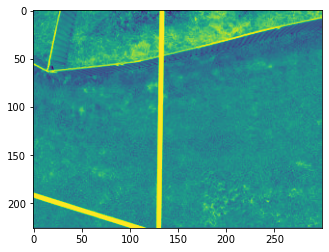

In [509]:
plt.imshow(img_dsttst)

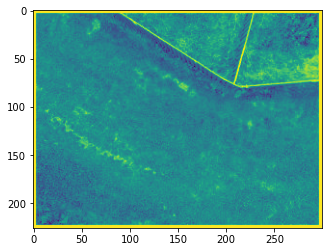

In [510]:
plt.imshow(img_src)

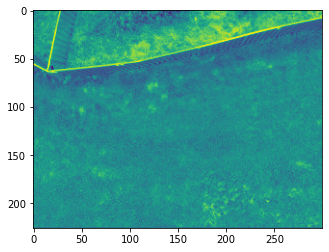

In [516]:
plt.imshow(img_dst)

In [560]:
df_data[df_data.index==6]

names       lats       lons   heights
6  P1110207- photo.JPG  40.353286 -74.719396  50.25782

In [561]:
df_data[df_data.index==19]

names       lats       lons    heights
19  P1110220- photo.JPG  40.353203 -74.719406  48.601631

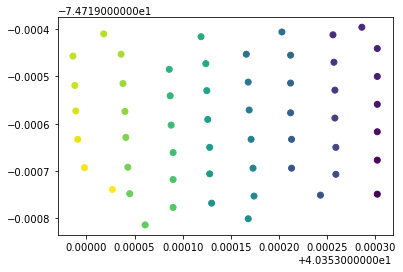

In [571]:
plt.scatter(df_data.lats,df_data.lons,c=df_data.index)

In [690]:
df_data[12:15]

names       lats       lons    heights
12  P1110213- photo.JPG  40.353259 -74.719707  48.498650
13  P1110214- photo.JPG  40.353243 -74.719751  48.536858
14  P1110215- photo.JPG  40.353213 -74.719694  48.229183

## notes on stopping 20221229
- lower lon = to the RIGHT
- lower lat = ABOVE
- next I want to:
    - pair images
    - mask keypoints based on lat/lon
    - merge into megaimage and either build on that image or .append megaimages
    - if appending, then iterate until all one image. would need to adj for new lat/lon
    - also need to generate and keep homographies to use on thermals

### thoughts
- if diff is 0,0 images should fully overlap (so width-0, height-0) = width,height
- if abs(lon) diff is more than 1.25e-04 will have zero l/r overlap 
- if abs(lat) diff is more than ????????? should have zero top/bottom overlap (>> )

In [ ]:
# 6-108.9 px wide overlap =lat0, lon 6xe-05, height = -0.2366
# 104 px wide overlap lat0, lon 5.8 e-05 height .12965
# 125 px wide overlap = lat0, lon 5.9 e05, height .1777
# 136 px wide overlap = lat0, lon 5.89 e05, height .3347
# 7/8= 127-153 px, lat=9.9999 e-07, lon -5.7999e05, height 0.01
# 120 px, lat=9.9999 e-07, lon -5.8999e05, height -0.0493
# 123 px, lat0, lon -5.9e05, height=-0.33
# 65-102 (102 by above measures), lat 1e-06, lon -6.1999e05, height -0.547

# (6/7) 76 px HEIGHT 272 width for lat -2.999e05, lon -1.6e05, height -0.78
# 6/8 34px height, 180 width for lat -2.899e05, lon -7.3999e05, height -0.77

# 47/49, 0 overlap, lat -2.999e05, lon -1.09e-04, height -.42

In [752]:
max_lon_idx=0
max_lat_idx=26

In [794]:
max_lat = .000038
for idx in np.arange(0,52):
    print(idx)
    if abs(df_data.lats[idx+2]-df_data.lats[idx]) > max_lat:
        print(df_data.lats[idx+2]-df_data.lats[idx])

0
1
2
3
4
5
-4.5999999997548e-05
6
7
8
9
10
11
12
-4.600000000465343e-05
13
14
15
16
17
18
-4.5999999997548e-05
19
20
21
22
23
24
25
-4.400000000259752e-05
26
-3.999999999848569e-05
27
28
29
30
31
32
-3.8000000003535206e-05
33
34
35
36
37
38
39
-4.500000000007276e-05
40
41
42
43
44
45
46
-5.000000000165983e-05
47
48
49
50
51


In [ ]:
# >> lat -3.7999e-05 for 26/7

In [819]:
print(df_data.heights[idx_val]- df_data.heights[idx_val+1])
df_data.heights[idx_val+1]

-1.0516700000000014


49.593079

In [820]:
idx_val=51
idx_val_2=idx_val+1

In [821]:
print(df_data.lats[idx_val_2]-df_data.lats[idx_val])
print(df_data.lons[idx_val_2]-df_data.lons[idx_val])
print(df_data.heights[idx_val_2]-df_data.heights[idx_val])

6.999999996537554e-06
-6.0000000004833964e-05
-0.16755299999999806


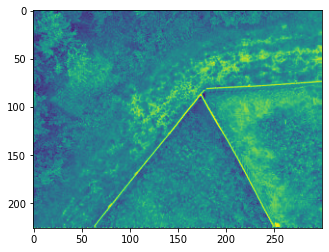

In [813]:
plt.imshow(imgs[idx_val_2])

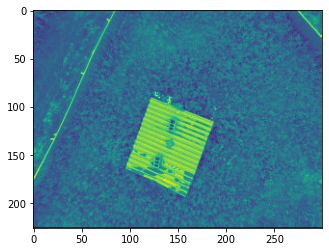

In [814]:
plt.imshow(imgs[idx_val])

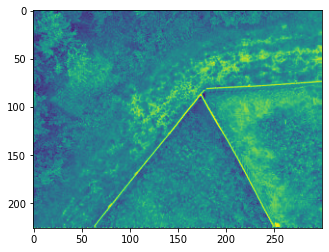

In [739]:
plt.imshow(imgs[idx_val+1])

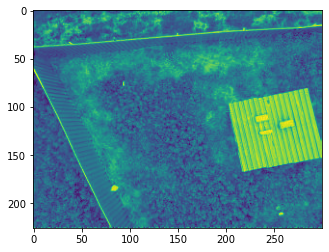

In [740]:
plt.imshow(imgs[idx_val+2])

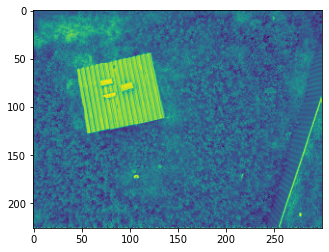

In [741]:
plt.imshow(imgs[idx_val+3])

In [513]:
dst = cv2.warpPerspective(img_dst,M,(img_src.shape[1] + img_dst.shape[1],img_dst.shape[0] + img_src.shape[0]))
dst[0:img_src.shape[0], 0:img_src.shape[1]] = img_src

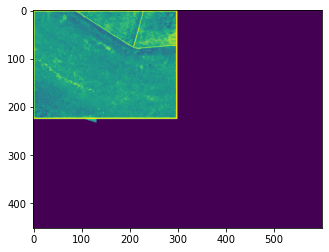

In [515]:
plt.imshow(dst)

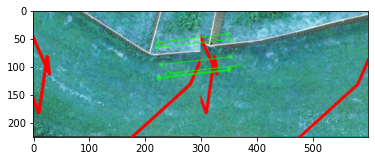

(<matplotlib.image.AxesImage at 0x20976e59700>, None)

In [386]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(imgs[3],kp1,imgs[2],kp2,matches[:10],None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

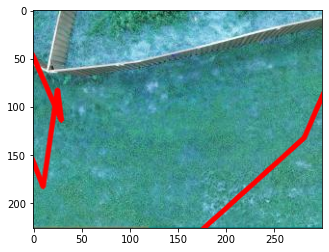

In [388]:
plt.imshow(imgs[2])

## imgs[0].shape

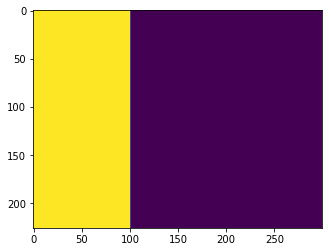

In [320]:
mask = np.zeros(imgs[0].shape[:2],dtype='uint8')
cv2.rectangle(mask,(0,0),(100,226),255,-1)
plt.imshow(mask)

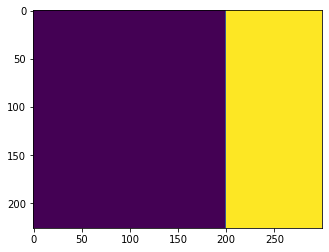

In [333]:
mask = np.zeros(imgs[0].shape[:2],dtype='uint8')
cv2.rectangle(mask,(200,0),(300,226),255,-1)
plt.imshow(mask)

In [270]:
stitchy=cv2.Stitcher.create()
(status,output)=stitchy.stitch(imgs[9:14])
print(status)

1


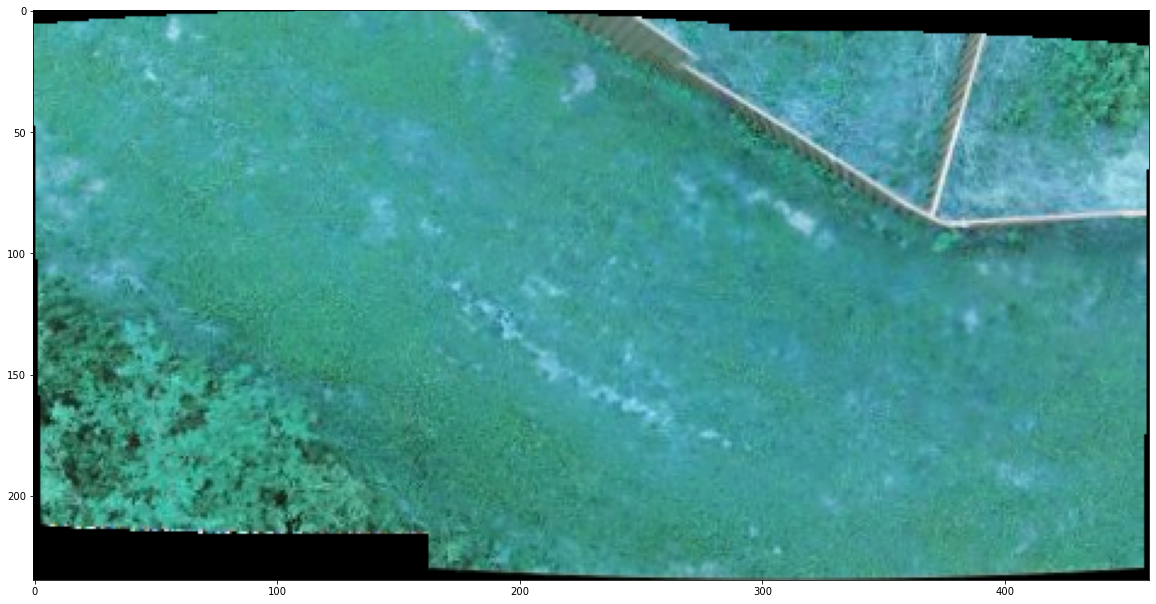

In [247]:
plt.figure(figsize=(20,20))
plt.imshow(output)

In [141]:
output5to10=output

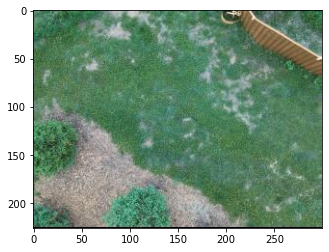

In [37]:
plt.imshow(p1)

In [38]:
image=p0
descriptor = cv2.features.SIFT_create()
(kps, features) = descriptor.detectAndCompute(image, None)

AttributeError: module 'cv2' has no attribute 'features'

In [ ]:
p0_kps=np.float32([kp.pt for kp in kps])
p0_features = features

(kps, features) = descriptor.detectAndCompute(p1_gray, None)
p1_kps=np.float32([kp.pt for kp in kps])
p1_features = features


In [ ]:
mode = cv2.Stitcher_PANORAMA
#mode = cv2.Stitcher_SCANS

stitcher = cv2.Stitcher.create(mode)
status, scn = stitcher.stitch([p1_gray,p0_gray])
print(status)

In [ ]:
img1=p1_gray
img2=p0_gray

In [20]:
sift = cv2.xfeatures2d.SIFT_create()
# find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

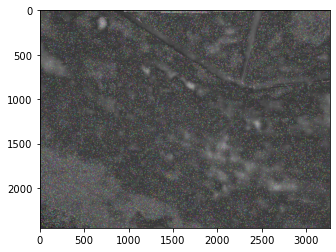

In [268]:
plt.imshow(cv2.drawKeypoints(img2,kp2,None))

In [269]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
match = cv2.FlannBasedMatcher(index_params, search_params)
matches = match.knnMatch(des1,des2,k=2)

In [270]:
good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)
good

[]

In [271]:

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv2.imshow("original_image_drawMatches.jpg", img3)

In [193]:
stitcher = cv2.Stitcher_create()
(status,stitched)=stitcher.stitch([p0_gray,p1_gray])
status

1

In [14]:
## tried calculating, don't have actual height nor starting point so height ANGLE isn't useful

In [46]:
df_data['hfov']=math.tan(math.radians(28.5))*2*df_data['heights']

In [538]:
df_data['adj_hfov']=df_data['hfov']/(np.max(df_data.hfov))

In [41]:
x=df_data.names[0]
photo=cv2.imread(os.path.join(fld,x))
x

'P1110201.JPG'

In [52]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [53]:
imagebox = OffsetImage(photo, zoom = df_data.adj_hfov[0])

In [61]:
ab = AnnotationBbox(imagebox, (df_data.lats[0], df_data.lons[0]), frameon = False)

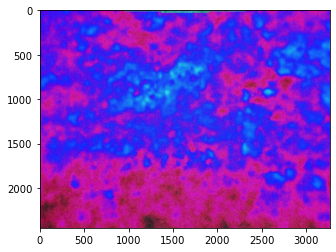

In [62]:
plt.imshow(photo)

In [71]:
# 2448x3264 px for each image
df_data['lat_m'] = 111139*df_data.lats
df_data['lon_m'] = 111139*df_data.lons

In [81]:
df_data['rel_lat_m']=df_data.lat_m-np.min(df_data.lat_m)
df_data['rel_lon_m']=df_data.lon_m-np.min(df_data.lon_m)

names       lats       lons    heights       hfov  adj_hfov  \
0   P1110201.JPG  40.353302 -74.719749  50.391037  54.720201  0.999346   
1   P1110202.JPG  40.353302 -74.719677  50.018593  54.315760  0.991960   
2   P1110203.JPG  40.353302 -74.719617  49.781898  54.058731  0.987266   
3   P1110204.JPG  40.353302 -74.719559  49.911552  54.199523  0.989837   
4   P1110205.JPG  40.353302 -74.719500  50.089298  54.392540  0.993362   
5   P1110206.JPG  40.353302 -74.719441  50.423992  54.755988  1.000000   
6   P1110207.JPG  40.353286 -74.719396  50.257820  54.575540  0.996705   
7   P1110208.JPG  40.353256 -74.719412  49.477783  53.728489  0.981235   
8   P1110209.JPG  40.353257 -74.719470  49.488148  53.739744  0.981441   
9   P1110210.JPG  40.353258 -74.719529  49.438854  53.686215  0.980463   
10  P1110211.JPG  40.353258 -74.719588  49.100647  53.318952  0.973756   
11  P1110212.JPG  40.353259 -74.719650  48.553024  52.724282  0.962895   
12  P1110213.JPG  40.353259 -74.719707  48.498650  52.665237  0.961817   
13  P1110214.JPG  40.353243 -74.719751  48.536858  52.706727  0.962575   
14  P1110215.JPG  40.353213 -74.719694  48.229183  52.372620  0.956473   
15  P1110216.JPG  40.353213 -74.719633  48.259315  52.405340  0.957070   
16  P1110217.JPG  40.353212 -74.719577  48.152302  52.289134  0.954948   
17  P1110218.JPG  40.353212 -74.719514  47.732910  51.833711  0.946631   
18  P1110219.JPG  40.353212 -74.719455  48.279667  52.427441  0.957474   
19  P1110220.JPG  40.353203 -74.719406  48.601631  52.777065  0.963859   
20  P1110221.JPG  40.353166 -74.719453  48.190708  52.330839  0.955710   
21  P1110222.JPG  40.353168 -74.719512  48.248558  52.393659  0.956857   
22  P1110223.JPG  40.353169 -74.719571  47.990734  52.113685  0.951744   
23  P1110224.JPG  40.353171 -74.719633  47.820026  51.928311  0.948359   
24  P1110225.JPG  40.353173 -74.719694  48.324955  52.476620  0.958372   
25  P1110226.JPG  40.353174 -74.719753  48.252415  52.397847  0.956934   
26  P1110227.JPG  40.353168 -74.719801  48.095158  52.227080  0.953815   
27  P1110228.JPG  40.353130 -74.719768  49.517487  53.771604  0.982022   
28  P1110229.JPG  40.353128 -74.719706  49.757084  54.031785  0.986774   
29  P1110230.JPG  40.353128 -74.719650  50.010040  54.306473  0.991791   
30  P1110231.JPG  40.353126 -74.719591  49.219620  53.448146  0.976115   
31  P1110232.JPG  40.353125 -74.719530  49.175812  53.400575  0.975246   
32  P1110233.JPG  40.353124 -74.719473  49.359528  53.600074  0.978890   
33  P1110234.JPG  40.353119 -74.719416  49.200508  53.427392  0.975736   
34  P1110235.JPG  40.353086 -74.719485  48.508247  52.675658  0.962007   
35  P1110236.JPG  40.353087 -74.719541  48.378315  52.534564  0.959430   
36  P1110237.JPG  40.353088 -74.719603  48.192627  52.332923  0.955748   
37  P1110238.JPG  40.353090 -74.719661  48.097347  52.229457  0.953858   
38  P1110239.JPG  40.353090 -74.719718  48.312412  52.462999  0.958124   
39  P1110240.JPG  40.353090 -74.719777  48.448509  52.610788  0.960823   
40  P1110241.JPG  40.353061 -74.719814  48.192722  52.333026  0.955750   
41  P1110242.JPG  40.353045 -74.719748  47.972477  52.093860  0.951382   
42  P1110243.JPG  40.353043 -74.719692  47.877441  51.990659  0.949497   
43  P1110244.JPG  40.353041 -74.719629  47.973705  52.095193  0.951406   
44  P1110245.JPG  40.353040 -74.719574  48.376717  52.532828  0.959399   
45  P1110246.JPG  40.353038 -74.719515  48.652466  52.832267  0.964867   
46  P1110247.JPG  40.353036 -74.719453  48.541409  52.711669  0.962665   
47  P1110248.JPG  40.353018 -74.719410  49.593079  53.853690  0.983521   
48  P1110249.JPG  40.352986 -74.719457  49.774014  54.050169  0.987110   
49  P1110250.JPG  40.352988 -74.719519  49.170834  53.395169  0.975148   
50  P1110251.JPG  40.352989 -74.719573  49.071033  53.286794  0.973168   
51  P1110252.JPG  40.352991 -74.719633  49.087410  53.304578  0.973493   
52  P1110253.JPG  40.352998 -74.719693  48.919857  53.122630  0.970170   
53  P1110254.JP

In [537]:
df_data

names       lats       lons    heights       hfov  adj_hfov  \
0   P1110201.JPG  40.353302 -74.719749  50.391037  54.720201  1.055688   
1   P1110202.JPG  40.353302 -74.719677  50.018593  54.315760  1.047885   
2   P1110203.JPG  40.353302 -74.719617  49.781898  54.058731  1.042926   
3   P1110204.JPG  40.353302 -74.719559  49.911552  54.199523  1.045642   
4   P1110205.JPG  40.353302 -74.719500  50.089298  54.392540  1.049366   
5   P1110206.JPG  40.353302 -74.719441  50.423992  54.755988  1.056378   
6   P1110207.JPG  40.353286 -74.719396  50.257820  54.575540  1.052897   
7   P1110208.JPG  40.353256 -74.719412  49.477783  53.728489  1.036555   
8   P1110209.JPG  40.353257 -74.719470  49.488148  53.739744  1.036772   
9   P1110210.JPG  40.353258 -74.719529  49.438854  53.686215  1.035739   
10  P1110211.JPG  40.353258 -74.719588  49.100647  53.318952  1.028654   
11  P1110212.JPG  40.353259 -74.719650  48.553024  52.724282  1.017181   
12  P1110213.JPG  40.353259 -74.719707  48.498650  52.665237  1.016042   
13  P1110214.JPG  40.353243 -74.719751  48.536858  52.706727  1.016843   
14  P1110215.JPG  40.353213 -74.719694  48.229183  52.372620  1.010397   
15  P1110216.JPG  40.353213 -74.719633  48.259315  52.405340  1.011028   
16  P1110217.JPG  40.353212 -74.719577  48.152302  52.289134  1.008786   
17  P1110218.JPG  40.353212 -74.719514  47.732910  51.833711  1.000000   
18  P1110219.JPG  40.353212 -74.719455  48.279667  52.427441  1.011455   
19  P1110220.JPG  40.353203 -74.719406  48.601631  52.777065  1.018200   
20  P1110221.JPG  40.353166 -74.719453  48.190708  52.330839  1.009591   
21  P1110222.JPG  40.353168 -74.719512  48.248558  52.393659  1.010803   
22  P1110223.JPG  40.353169 -74.719571  47.990734  52.113685  1.005401   
23  P1110224.JPG  40.353171 -74.719633  47.820026  51.928311  1.001825   
24  P1110225.JPG  40.353173 -74.719694  48.324955  52.476620  1.012403   
25  P1110226.JPG  40.353174 -74.719753  48.252415  52.397847  1.010884   
26  P1110227.JPG  40.353168 -74.719801  48.095158  52.227080  1.007589   
27  P1110228.JPG  40.353130 -74.719768  49.517487  53.771604  1.037387   
28  P1110229.JPG  40.353128 -74.719706  49.757084  54.031785  1.042406   
29  P1110230.JPG  40.353128 -74.719650  50.010040  54.306473  1.047706   
30  P1110231.JPG  40.353126 -74.719591  49.219620  53.448146  1.031146   
31  P1110232.JPG  40.353125 -74.719530  49.175812  53.400575  1.030229   
32  P1110233.JPG  40.353124 -74.719473  49.359528  53.600074  1.034077   
33  P1110234.JPG  40.353119 -74.719416  49.200508  53.427392  1.030746   
34  P1110235.JPG  40.353086 -74.719485  48.508247  52.675658  1.016243   
35  P1110236.JPG  40.353087 -74.719541  48.378315  52.534564  1.013521   
36  P1110237.JPG  40.353088 -74.719603  48.192627  52.332923  1.009631   
37  P1110238.JPG  40.353090 -74.719661  48.097347  52.229457  1.007635   
38  P1110239.JPG  40.353090 -74.719718  48.312412  52.462999  1.012141   
39  P1110240.JPG  40.353090 -74.719777  48.448509  52.610788  1.014992   
40  P1110241.JPG  40.353061 -74.719814  48.192722  52.333026  1.009633   
41  P1110242.JPG  40.353045 -74.719748  47.972477  52.093860  1.005019   
42  P1110243.JPG  40.353043 -74.719692  47.877441  51.990659  1.003028   
43  P1110244.JPG  40.353041 -74.719629  47.973705  52.095193  1.005045   
44  P1110245.JPG  40.353040 -74.719574  48.376717  52.532828  1.013488   
45  P1110246.JPG  40.353038 -74.719515  48.652466  52.832267  1.019265   
46  P1110247.JPG  40.353036 -74.719453  48.541409  52.711669  1.016938   
47  P1110248.JPG  40.353018 -74.719410  49.593079  53.853690  1.038970   
48  P1110249.JPG  40.352986 -74.719457  49.774014  54.050169  1.042761   
49  P1110250.JPG  40.352988 -74.719519  49.170834  53.395169  1.030124   
50  P1110251.JPG  40.352989 -74.719573  49.071033  53.286794  1.028034   
51  P1110252.JPG  40.352991 -74.719633  49.087410  53.304578  1.028377   
52  P1110253.JPG  40.352998 -74.719693  48.919857  53.122630  1.024866   
53  P1110254.JP

In [539]:
hfov_static=11.4
hfov_max = hfov_static*(np.max(df_data.adj_hfov))+2
print(hfov_max)
latval=round(hfov_max + np.max(df_data.rel_lat_m) - np.min(df_data.rel_lat_m))
print(latval)
lonval=round(hfov_max + np.max(df_data.rel_lon_m) - np.min(df_data.rel_lon_m))
print(lonval)
#big_img = np.zeros()

13.4
49
60


In [540]:
[height,width,depth]=np.shape(img)
print(height,width,depth)

2448 3264 3


In [541]:
big_img = np.zeros((latval*100,lonval*100,3))
for idx in df_data.index[0:25]:
    hfov_10x= round(hfov_static*df_data.adj_hfov[idx]*100)
    print(hfov_10x)
    img=Image.open(os.path.join(fld,df_data.names[idx]))
    start_val_lat=round(100*(df_data.rel_lat_m[idx]))
    end_val_lat = start_val_lat+round(height*(hfov_10x/width))    
    start_val_lon=5400-round(100*(df_data.rel_lon_m[idx]))
    end_val_lon = start_val_lon+hfov_10x
    resized_img_arr = np.array(img.resize((hfov_10x,round(height*(hfov_10x/width)))))
    big_img[start_val_lat:end_val_lat,start_val_lon:end_val_lon] = resized_img_arr

1139
1131
1125
1128
1132
1140
1136
1119
1119
1118
1110
1098
1096
1097
1090
1091
1089
1079
1092
1099
1090
1091
1085
1081
1093


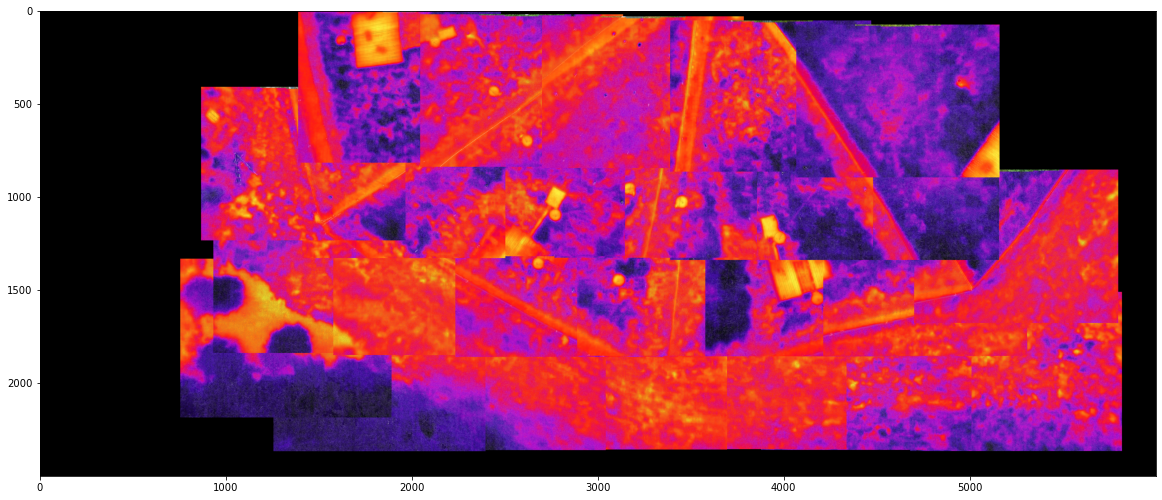

In [542]:
plt.figure(figsize=(20,20))
plt.imshow(big_img[2000:4500,:].astype(int))


In [518]:
print("compare")

compare


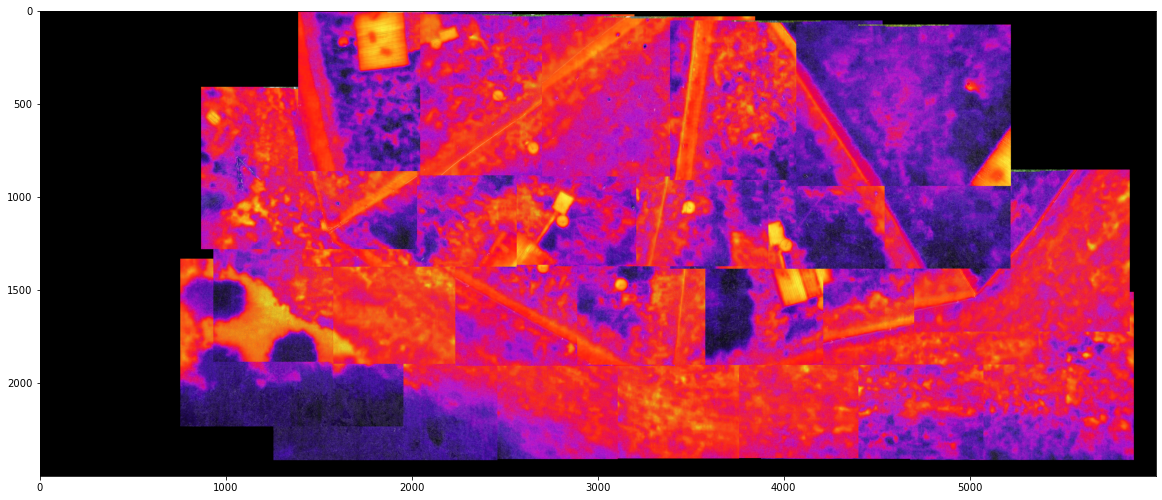

In [536]:
plt.figure(figsize=(20,20))
plt.imshow(big_img[2000:4500,:].astype(int))

In [428]:
# ideally, in overlapping regions, 
#find max val, set to equal and re-adjust whole image vals accordingly 
#(keeping in mind max val of all will be diff)

In [68]:
photo_vals = (lats[0],lons[0])
min_max_dist=0
min_max_dist_val=100000000
    
for idx in df_data.index:
    testval = (df_data.lats[idx],df_data.lons[idx])
    if math.dist(photo_vals,testval) >0 and math.dist(photo_vals,testval)< min_max_dist_val:
        min_max_dist=idx
        min_max_dist_val=math.dist(photo_vals,testval)
        print(idx)
        print(min_max_dist_val)

1
7.199999998874773e-05
12
6.010823570258977e-05
13
5.903388857314529e-05


In [116]:
new_photo_vals=(lats[1],lons[1])
print(new_photo_vals)
print(photo_vals)

(40.353302, -74.719677)
(40.353302, -74.719749)


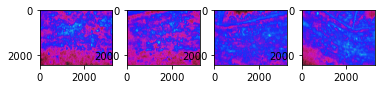

In [119]:
plt.subplot(1,4,1)
plt.imshow(photo)
plt.subplot(1,4,2)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[1])))
plt.subplot(1,4,3)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[2])))
plt.subplot(1,4,4)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[3])))


In [169]:
p0=cv2.imread(os.path.join(fld,df_data.names[3]))
p1=cv2.imread(os.path.join(fld,df_data.names[2]))

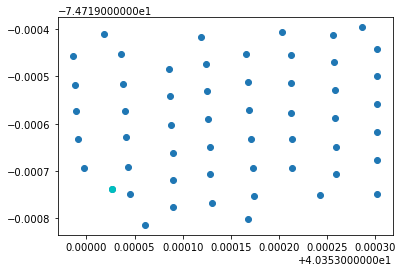

In [115]:
i=53
plt.scatter(df_data.lats,df_data.lons)
plt.scatter(df_data.lats[i],df_data.lons[i],c='c')

In [121]:
names=['wedge3','wedge4','wedge5','wedge6','wedge7','wedge8','wedge1','wedge2','tower']

In [122]:
coords=[(40.353241,-74.719421),(40.353305,-74.719577),(40.353270,-74.719740),(40.353152,-74.719831),(40.353023,-74.719780),(40.352954,-74.719629),(40.352987,-74.719459),(40.353108,-74.719376),(40.353130,-74.719599)]

()

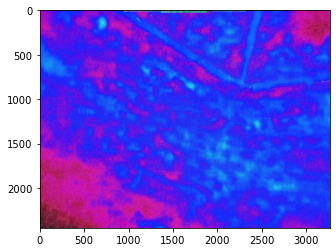

In [179]:
plt.imshow(p0)

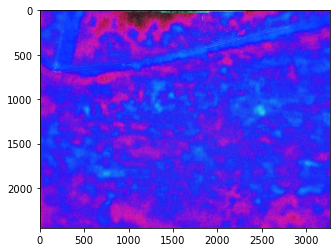

In [182]:
plt.imshow(p1)

In [545]:
df_data[5:8]

names       lats       lons    heights       hfov  adj_hfov  \
5  P1110206.JPG  40.353302 -74.719441  50.423992  54.755988  1.000000   
6  P1110207.JPG  40.353286 -74.719396  50.257820  54.575540  0.996705   
7  P1110208.JPG  40.353256 -74.719412  49.477783  53.728489  0.981235   

          lat_m         lon_m  rel_lat_m  rel_lon_m  
5  4.484826e+06 -8.304244e+06  35.119924  41.454847  
6  4.484824e+06 -8.304239e+06  33.341700  46.456102  
7  4.484821e+06 -8.304241e+06  30.007530  44.677878

# old

building off of https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/ 

In [24]:
fld = '/Users/dennise/Desktop/20210612'
thermal_images=[]
images=[]
images_names=[]
thermal_images_names=[]
for file in sorted(os.listdir(fld)):
    if 'full photo.JPG' in file:
        print(file)
        im = cv2.imread(os.path.join(fld,file))
        images.append(im)
        images_names.append(file)
        #if 'photo' in file:
        #    images.append(im)
        #    images_names.append(file)
        #else:
        #    thermal_images.append(im)
        #    thermal_images_names.append(file)

06122021_511- full photo.JPG
06122021_512- full photo.JPG
06122021_514- full photo.JPG
06122021_515- full photo.JPG
06122021_516- full photo.JPG
06122021_517- full photo.JPG
06122021_518- full photo.JPG
06122021_519- full photo.JPG
06122021_520- full photo.JPG
06122021_521- full photo.JPG
06122021_522- full photo.JPG
06122021_523- full photo.JPG
06122021_524- full photo.JPG
06122021_525- full photo.JPG
06122021_526- full photo.JPG
06122021_527- full photo.JPG
06122021_528- full photo.JPG
06122021_529- full photo.JPG
06122021_530- full photo.JPG
06122021_531- full photo.JPG
06122021_532- full photo.JPG
06122021_533- full photo.JPG
06122021_534- full photo.JPG
06122021_535- full photo.JPG
06122021_536- full photo.JPG
06122021_537- full photo.JPG
06122021_538- full photo.JPG
06122021_539- full photo.JPG
06122021_540- full photo.JPG
06122021_541- full photo.JPG
06122021_542- full photo.JPG
06122021_543- full photo.JPG
06122021_544- full photo.JPG
06122021_545- full photo.JPG
06122021_546- 

In [25]:
#563, 562
print(images_names[-4])
print(images_names[-5])

06122021_563- full photo.JPG
06122021_562- full photo.JPG


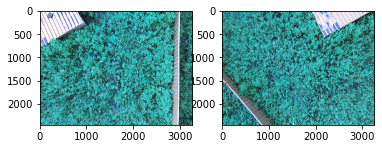

In [26]:
val=-5
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[val:val+2],)
image0 = np.squeeze(images[val])
image1 = np.squeeze(images[val+1])

plt.subplot(1,2,1)
plt.imshow(image0)
plt.subplot(1,2,2)
plt.imshow(image1)

In [35]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([image1,image0])
np.shape(stitched)

()

In [33]:
plt.scatter(kps2[:,0],kps2[:,1],0.1)

NameError: name 'kps2' is not defined

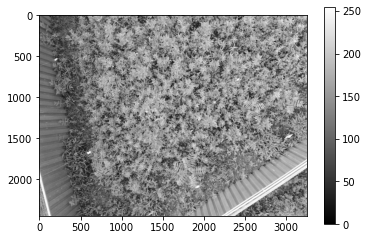

In [10]:
plt.imshow(gray,cmap='gray')
plt.colorbar()

In [11]:
final_stitched_image=images
progress_stitch = []
while len(final_stitched_image)!=1:
    print("length is {}... now stitching".format(len(final_stitched_image)))
    final_stitched_image = stitch_images_iteratively(final_stitched_image)
    progress_stitch.append(final_stitched_image)

length is 54... now stitching
0
2
4
6
8
10


KeyboardInterrupt: 

In [ ]:
final_stitched_image=images
final_stitched_image = stitch_images_iteratively(final_stitched_image)
progress_stitch.append(final_stitched_image)

In [30]:
stitched_images=[]
for i in np.arange(0,4,2):
    stitcher = cv2.Stitcher_create()
    (status, stitched) = stitcher.stitch(images[i],images[i-1])
    stitched_images.append(stitched)

0
2


In [54]:
i=8
(status, stitched)=stitcher.stitch(images[i],images[i-1])

1

In [136]:
?stitcher.stitch

Docstring:
stitch(images[, pano]) -> retval, pano
.   @overload



stitch(images, masks[, pano]) -> retval, pano
.   @brief These functions try to stitch the given images.
.   
.       @param images Input images.
.       @param masks Masks for each input image specifying where to look for keypoints (optional).
.       @param pano Final pano.
.       @return Status code.
Type:      builtin_function_or_method


In [36]:
i=-5
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[i],images[i+1])
print(status)
np.shape(stitched)

1


(2448, 3264, 3)

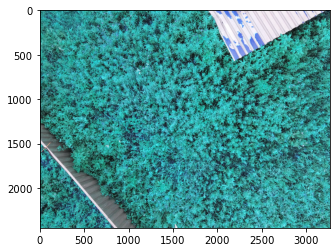

In [37]:
plt.imshow(stitched)

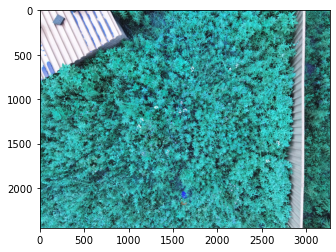

In [38]:
plt.imshow(images[i])

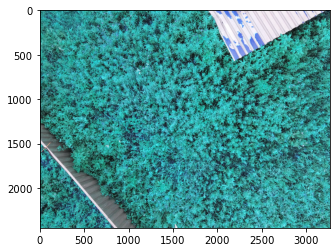

In [39]:
plt.imshow(images[i+1])

In [59]:

MIN_MATCH_COUNT = 10
img1 = image1
img2 = image2

In [72]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image0,None)
kp2, des2 = sift.detectAndCompute(image1,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

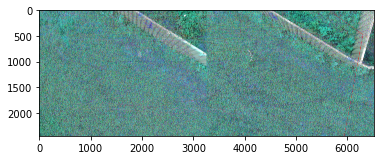

In [62]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,img2)
plt.imshow(img3)
plt.show()

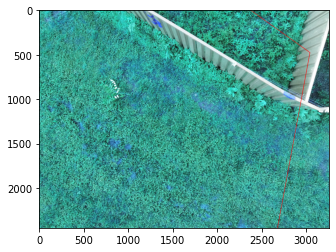

In [67]:
plt.imshow(img2)
plt.show()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]